# MergeSort Híbrido

### Preliminares

In [1]:
import IPython.display
import numpy as np
import pylab as pl
import math
import itertools
import time
import gc
%matplotlib inline

def easyTests(): return [x for x in xrange(4, 7)]
def mediumTests(): return [x for x in xrange(4, 8)]
def hardTests(): return [x for x in xrange(4, 12)]

### Especificaciones Técnicas: 
Los experimentos fueron realizados en un equipo con las siguientes características: Procesador AMD Athlon(tm) II P360 Dual-Core 2.3Mhz, 2 GB de memoria RAM, jupyter 4.1.0 y python 2.7.11 en el paquete Anaconda 4.0.0 versión 32-bit. Sobre Debian GNU/Linux 8.4 (jessie), núcleo 3.16.0-4-686-pae, entorno de escritorio MATE 1.8.1.

### 1. Análisis Experimental de InsertionSort

In [2]:
def insertionSortHelper(A, p, q):
    j = p + 1
    while j <= q:
        keyValue = A[j]
        i = j - 1
        while i >= 0 and A[i] > keyValue:
            A[i + 1] = A[i]
            i -= 1
        A[i + 1] = keyValue
        j += 1
        
def insertionSort(A):
    insertionSortHelper(A, 0, len(A) - 1)

In [3]:
def experimentalTimeSpecialCases(function, size, order): #Usado para el caso de los peores y mejores casos de insertionSort
    results = []
    gc.collect()
    for i in xrange(math.factorial(size)):        
        listCopy = [x for x in range(1, size+1)]
        if order == -1:
            listCopy = listCopy[::-1]
        tic = time.clock()
        function(listCopy)
        toc = time.clock()            
        results.append(toc-tic)
    return results

In [4]:
def experimentalTime(function, problemSizes, extraParams):
    averageCaseTime = {}
    
    for size in problemSizes:
        initialList = [x for x in range(1, size+1)]
        partialResults = []
        gc.collect()
        for perm in itertools.permutations(initialList, len(initialList)):
            cp = list(perm)
            tic = time.clock()
            function(cp)
            toc = time.clock()            
            partialResults.append(toc-tic)  
        averageCaseTime[size] = partialResults
    
    bestCaseTimes = {}
    worstCaseTimes = {}
    if extraParams:
        for size in problemSizes:
            bestCaseTimes[size] = experimentalTimeSpecialCases(function, size, 0) #Orden ascendente
            worstCaseTimes[size] = experimentalTimeSpecialCases(function, size, -1) #Orden descendente
            
    return bestCaseTimes, averageCaseTime, worstCaseTimes

In [5]:
# Código para mostrar una lista de listas como una tabla en el notebook
# Este código fue modificado del presentado en:
# http://stackoverflow.com/questions/30523735/python-dictionary-as-html-table-in-ipython-notebook

class createTable(list):    
    def _repr_html_(self):
        html = ["<center><table>"]
        for lists in self:
            html.append("<tr>")            
            for items in lists:
                html.append("<td>{0}</td>".format(items))            
            html.append("</tr>")
        html.append("</table></center>")
        return ''.join(html)

In [6]:
def runExperimental(function, problemSizes, extraParams):
    best, average, worst = experimentalTime(function, problemSizes, extraParams)
    table = []
    if not extraParams:
        table = [['N', 'Average Case']]   
        for size in problemSizes:
            table.append([size, np.mean(average[size])])
    else:
        table = [['N', 'Best Case', 'Average Case',  'Worst Case']]   
        for size in problemSizes:
            table.append([size, np.mean(best[size]), np.mean(average[size]), np.mean(worst[size])])
    return table

def graph(results):
    formatted = []
    for j in xrange(0, 4):        
        tmp = []
        for i in xrange(1, len(results)):
            tmp.append(results[i][j])
        formatted.append(tmp)
    pl.plot(formatted[0], formatted[1], '-y', label = 'Best Case')
    pl.plot(formatted[0], formatted[2], '-b', label = 'Average Case')
    pl.plot(formatted[0], formatted[3], '-r', label = 'Worst Case')
    pl.xlabel('Array size')
    pl.ylabel('Time')
    pl.legend(loc = 'upper left')

#### Resultados obtenidos

Luego de correr el algoritmo de Insertion Sort para los tamaños de entrada propuestos (n = 4, 5, 6) no es muy clara la relación que existe entre los resultados obtenidos y cada posible caso en la corrida del algoritmo, por lo que personalmente, decidí hacer otro experimento con tamaños de arreglo desde n = 4 hasta n = 7.

In [9]:
results1 = runExperimental(insertionSort, easyTests(), True)
createTable(results1)

N,Best Case,Average Case,Worst Case
4,2.15458343381e-06,4.42429728024e-06,8.37162570855e-06
5,2.18418839702e-06,3.197336027e-06,4.23679917981e-06
6,2.4270587434e-06,4.98514686101e-06,5.77954670722e-06


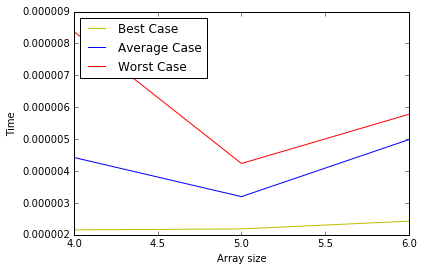

In [10]:
graph(results1)

In [11]:
results2 = runExperimental(insertionSort, mediumTests(), True)
createTable(results2)

N,Best Case,Average Case,Worst Case
4,2.17103063549e-06,2.66444668928e-06,3.53614838396e-06
5,2.18089895666e-06,4.26969358337e-06,4.19732589556e-06
6,3.11345529791e-06,4.37879335522e-06,6.06079385775e-06
7,2.79735574357e-06,4.94786653697e-06,7.03767932377e-06


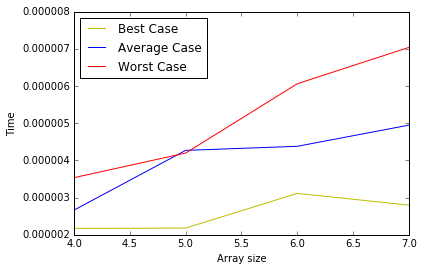

In [12]:
graph(results2)

Para la interpolación se usará un sistema de ecuaciones de 3x3, sabiendo que tenemos tres puntos que corresponden a los tres tamaños de arreglo sugeridos, tal que cada grupo de éstos corresponde a una corrida del mejor caso, el caso promedio y el peor caso. Sea la ecuación cuadrática de la forma $y = ax^2+bx+c$ y los puntos suministrados como $(x_i, y_i) \forall_i, i=(1, 2, 3)$ se plantea el sistema de ecuaciones:

$$
\begin{eqnarray}
y = ax_1^2+bx_1+c \\
y = ax_2^2+bx_2+c \\
y = ax_3^2+bx_3+c
\nonumber
\end{eqnarray}
$$

Que se resolverá haciendo uso de la siguiente función:

In [13]:
def solveEquations(results):
    formatted = []
    for j in xrange(0, 4):        
        tmp = []
        for i in xrange(1, len(results)):
            tmp.append(results[i][j])
        formatted.append(tmp)
    xPoints = np.array([[formatted[0][0]**2.0, formatted[0][0], 1],
                  [formatted[0][1]**2, formatted[0][1], 1],
                  [formatted[0][2]**2, formatted[0][2], 1]])
    best = np.array(formatted[1])
    best_coeff = np.linalg.solve(xPoints, best)
    avg = np.array(formatted[2])
    avg_coeff = np.linalg.solve(xPoints, avg)
    worst = np.array(formatted[3])
    worst_coeff = np.linalg.solve(xPoints, worst)
    return (list(best_coeff), list(avg_coeff), list(worst_coeff))    

Los coeficientes son:

In [14]:
coefficients = solveEquations(results1)
print "-----\nBEST CASE:\n-----"
print "a =",coefficients[0][0], ", b=", coefficients[0][1], ", c=", coefficients[0][2]
print "-----\nAVERAGE CASE:\n-----"
print "a =",coefficients[1][0], ", b=", coefficients[1][1], ", c=", coefficients[1][2]
print "-----\nBEST CASE:\n-----"
print "a =",coefficients[2][0], ", b=", coefficients[2][1], ", c=", coefficients[2][2]
    

-----
BEST CASE:
-----
a = 1.06632691585e-07 , b= -9.3008926106e-07 , c= 4.16881741269e-06
-----
AVERAGE CASE:
-----
a = 1.50738604363e-06 , b= -1.47934356459e-05 , c= 3.94798631658e-05
-----
BEST CASE:
-----
a = 2.83878702808e-06 , b= -2.96839097814e-05 , c= 8.1686672385e-05


Una vez calculados los coeficientes de las curvas requeridas, se procederá a graficar dichas ecuaciones

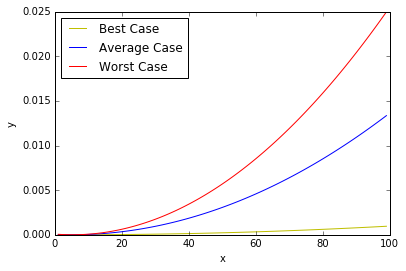

In [15]:
def graphInterpolations(coeff):
    x = np.arange(1,100,1)
    best = coeff[0][0]*x**2 + coeff[0][1]*x+coeff[0][2]
    avg = coeff[1][0]*x**2 + coeff[1][1]*x+coeff[1][2]
    worst = coeff[2][0]*x**2 + coeff[2][1]*x+coeff[2][2]
    pl.plot(x, best, '-y', label = 'Best Case')
    pl.plot(x, avg, '-b', label = 'Average Case')
    pl.plot(x, worst, '-r', label = 'Worst Case')
    pl.xlabel('x')
    pl.ylabel('y')
    pl.legend(loc = 'upper left')

graphInterpolations(coefficients)

### 2. Análisis de InsertionSort + MergeSort

In [16]:
def merge(A, p, q, r):
    L = A[p:q+1]+[float('inf')]
    R = A[q+1:r+1]+[float('inf')]
    i = j = 0
    for k in xrange(p, r+1):
        if L[i] <= R[j]:
            A[k] = L[i]
            i += 1
        else:
            A[k] = R[j]
            j += 1

def mergeSortHelper(A, p, r):
    if p < r:
        q = int((p+r)/2)
        mergeSortHelper(A, p, q)
        mergeSortHelper(A, q+1, r)
        merge(A, p, q, r)

def mergeSort(A):
    mergeSortHelper(A, 0, len(A)-1)

In [17]:
resultsMergeSort = runExperimental(mergeSort, hardTests(), False)
createTable(resultsMergeSort)

N,Average Case
4,8.30583690138e-05
5,3.0058905982e-05
6,1.81906051742e-05
7,2.19364945406e-05
8,2.54468756416e-05
9,2.9616589383e-05
10,3.32501100963e-05
11,3.70282281563e-05


In [18]:
resultsInSort = runExperimental(insertionSort, hardTests(), False)
createTable(resultsInSort)

N,Average Case
4,2.66444664021e-06
5,3.56246389401e-06
6,3.99228411538e-06
7,4.98177910339e-06
8,6.23876628604e-06
9,7.9591261901e-06
10,8.65601893038e-06
11,1.00273415811e-05


In [19]:
def graphVersus(insertion, merge, hybrid):
    times = []
    for j in [0, 1]:        
        tmp = []
        for i in xrange(1, len(insertion)):
            tmp.append(insertion[i][j])
        times.append(tmp)
    tmp = []
    for i in xrange(1, len(merge)):
        tmp.append(merge[i][1])
    times.append(tmp)
    pl.plot(times[0], times[1], 'rx', label = 'Insertion Sort')
    pl.plot(times[0], times[2], 'bx', label = 'Merge Sort')
    if hybrid != None:
        tmp = []
        for i in xrange(1, len(hybrid)):
            tmp.append(hybrid[i][1])
        times.append(tmp)
        pl.plot(times[0], times[3], 'gx', label = 'Hybrid Merge Sort')
    pl.xlabel('Array size')
    pl.ylabel('Time')
    pl.legend(loc = 'upper left')

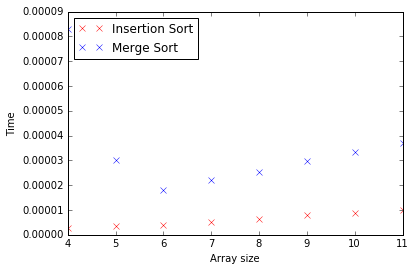

In [20]:
graphVersus(resultsInSort, resultsMergeSort, None)

Particularmente en este experimento, intenté con arreglos de n = 20, pero el compilador me arrojó un MemoryError luego de dos horas y media de ejecución aproximadamente, fui bajando el tamaño del arreglo y siempre persistía ese error, ante la imposibilidad de ejecutar mi código en un computador mejor, decidí realizar el siguiente experimento, con una permutación al azar para cada tamaño y la misma para cada algoritmo, arrojando los resultados expuestos más adelante.

En concreto, luego de realizar dicho experimento con arreglos de tamaño 2 hasta 130, parece ser que el punto en que debe usarse insertion Sort, es para arreglos de tamaño aproximadamente 80.

In [21]:
def hybridMergeSortHelper(A, p, r):
    if r - p < 80:
        insertionSortHelper(A, p, r)
    else:
        if p < r:
            q = int((p+r)/2)
            hybridMergeSortHelper(A, p, q)
            hybridMergeSortHelper(A, q+1, r)
            merge(A, p, q, r)

def hybridMergeSort(A):
    hybridMergeSortHelper(A, 0, len(A)-1)

In [22]:
resultsHybrid = runExperimental(hybridMergeSort, hardTests(), False)
createTable(resultsInSort)

N,Average Case
4,2.66444664021e-06
5,3.56246389401e-06
6,3.99228411538e-06
7,4.98177910339e-06
8,6.23876628604e-06
9,7.9591261901e-06
10,8.65601893038e-06
11,1.00273415811e-05


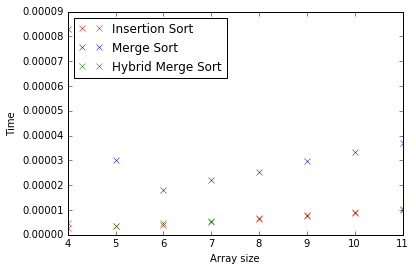

In [23]:
graphVersus(resultsInSort, resultsMergeSort, resultsHybrid)

In [24]:
def experimentalRandomArrays(function, initialList):
    gc.collect()
    partialResults = 0
    for i in xrange(10):
        copy1 = list(initialList)
        tic = time.clock();
        function(copy1)
        toc = time.clock();           
        partialResults += toc-tic
    return partialResults / 10

In [25]:
import random

def runExperimentalRandom(maxSize):
    resultsInsertion = []
    resultsMerge = []
    resultsHybrid = []
    sizes = [] # Para completar el formato de presentación de gráficos
    gc.collect()
    for size in xrange(2,maxSize+1):
        sizes.append(size)
        initialList = [x for x in xrange(size)]
        random.shuffle(initialList)
        resultsInsertion.append(experimentalRandomArrays(insertionSort, initialList))
        resultsMerge.append(experimentalRandomArrays(mergeSort, initialList))
        resultsHybrid.append(experimentalRandomArrays(hybridMergeSort, initialList))
    table = [['N', 'Insertion Sort', 'Merge Sort',  'HybridMerge Sort']]   
    rInSort = [['N', 'Average']]
    rMerSort = [['N', 'Average']]
    rHySort = [['N', 'Average']]
    for i in xrange(len(resultsInsertion)):
        table.append([i+2, resultsInsertion[i], resultsMerge[i], resultsHybrid[i]])
        rInSort.append([i+2, resultsInsertion[i]])
        rMerSort.append([i+2, resultsMerge[i]])
        rHySort.append([i+2, resultsHybrid[i]])
    return table, rInSort, rMerSort, rHySort

In [30]:
finalResults = runExperimentalRandom(130)
#createTable(finalResults[0])

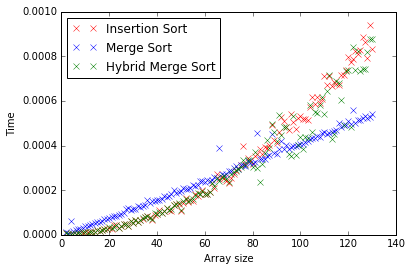

In [31]:
graphVersus(finalResults[1], finalResults[2], finalResults[3])

Luis Ernesto Gil Castellanos

### FIN